In [24]:
import _pickle as cPickle
import random
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import math
import scipy.spatial as spatial
import matplotlib.pyplot as plt

### Coverage of Multilingual Embeddings:

In [4]:
results_dir = "/Users/MeryemMhamdi/GoogleDriveEPFL/Gdrive Thesis/4 Results/MLPFineModels_RCV/"

In [ ]:
with open(results_dir+"multi_lang_word_vocab.p","rb") as file:
    not_covered_words = cPickle.load(file, encoding='latin1')

In [5]:
with open(results_dir+"en,de,fr,it_multiSkip_40_normalized_not_covered_words.p","rb") as file:
    not_covered_words = cPickle.load(file, encoding='latin1')

In [6]:
with open(results_dir+"en,de,fr,it_multiSkip_40_normalized_covered_words.p","rb") as file:
    covered_words = cPickle.load(file, encoding='latin1')

In [7]:
len(not_covered_words)

1566803

In [8]:
len(covered_words)

160326

In [9]:
covered_words[0:100]

['spingono',
 'bollwerk',
 'keven',
 'nationalstolz',
 'riportarle',
 'arbeitsminister',
 'gainsbourg',
 'birrell',
 'blasse',
 'milestones',
 'expeditionary',
 'warmherzig',
 'balade',
 'terminierung',
 'stoicism',
 'activating',
 'fis',
 'fiv',
 'fit',
 'fia',
 'fig',
 'fie',
 'fii',
 'fin',
 'fio',
 'fil',
 'fim',
 'elizardo',
 'zuid',
 'parasites',
 'parasiten',
 'spongiformen',
 'pumpkins',
 'absolved',
 'skanderbeg',
 'majo',
 'otello',
 'weiterzuentwickeln',
 'precluding',
 'programmatic',
 'programmatik',
 'zahler',
 'belegbar',
 'unterstreichen',
 'meaningfulness',
 'month-long',
 'angel',
 'intuitiv',
 'acquistando',
 'misconstrued',
 'half-billion',
 'aussterbende',
 'remand',
 'zugewiesenen',
 'peremptory',
 'mentors',
 'preparando',
 'promets',
 'keynesians',
 'greatest',
 'anti-smoking',
 'konzerne',
 'kellett',
 'pre-tax',
 'altan',
 'rivalisierende',
 'benedikt',
 'decorrenza',
 'lars',
 'suwon',
 'moresby',
 'affrontaient',
 'macht',
 'machu',
 'afi',
 'lara',
 'grappl

In [10]:
not_covered_words[0:100]

['apec-gipfel',
 'soestdijk',
 'panikartiges',
 '378460',
 'renault-titel',
 '532,556',
 '39.270',
 '39.277',
 '532,551',
 '*****brazil',
 '89370',
 '566,620',
 '..jusuf',
 'zinke',
 '474540.000',
 '16,894,000',
 'panikartigen',
 'respectivement-dans',
 'oktoberrate',
 'fußgängertunnels',
 '24.50/25.00',
 '1,250,413',
 'dienst-und',
 'rimandasse',
 '6,2205/15',
 '1,897,400',
 '17-billion-baht',
 'springettysbury',
 '17.25-21.25',
 '*93.360-93.625',
 'ciruculated',
 'huntgtn',
 'sodomisation',
 '95.00/95.50/96.00',
 '9.11/8.98',
 'cauition',
 '1.4188/98',
 'mankowski/new',
 'privatvermögen',
 '6,878.81',
 'multi-point',
 'salination',
 'lanuf/leghorn',
 'installaton',
 'bundeswehr-zeit',
 '1,233,172',
 "l'ajustement",
 'tillered/',
 'ff/q-86',
 'gaskets',
 'aa-boosted',
 '43:23.919',
 '1367.140',
 '108,459',
 'konsolidierungspfad',
 '1100-1200lb',
 '108,457',
 '1,766/166',
 '108,451',
 '108,450',
 '1,424,140',
 'tuxtepec',
 '51,776,000',
 'éré',
 '2,074,817',
 '1,232,347',
 '//www.banko

## Visualization of Fine Tuned Multilingual Embeddings:

In [3]:
model_path = "/Users/MeryemMhamdi/GoogleDriveEPFL/Gdrive Thesis/4 Results/MLPFineModels_RCV/"
file_name = "en,de,fr,it_multiSkip_40_normalized_fine_tuned_emb.p"
with open(model_path+file_name,"rb") as file:
    model = cPickle.load(file, encoding='latin1')

In [8]:
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

In [14]:
model_new = {k: v for k, v in model.items() if not hasNumbers(k) and "*" not in k and "." not in k}

In [36]:
keys = random.sample(list(model_new), 1000)
values = [model_new[k] for k in keys]
#n_items = take(n, model_new.iteritems())
model_sample = dict(zip(keys, values))

In [37]:
def tsne_plot(model):
    "Creates an TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.keys():
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, verbose=1, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.106s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.616241
[t-SNE] Error after 1000 iterations: 0.618459


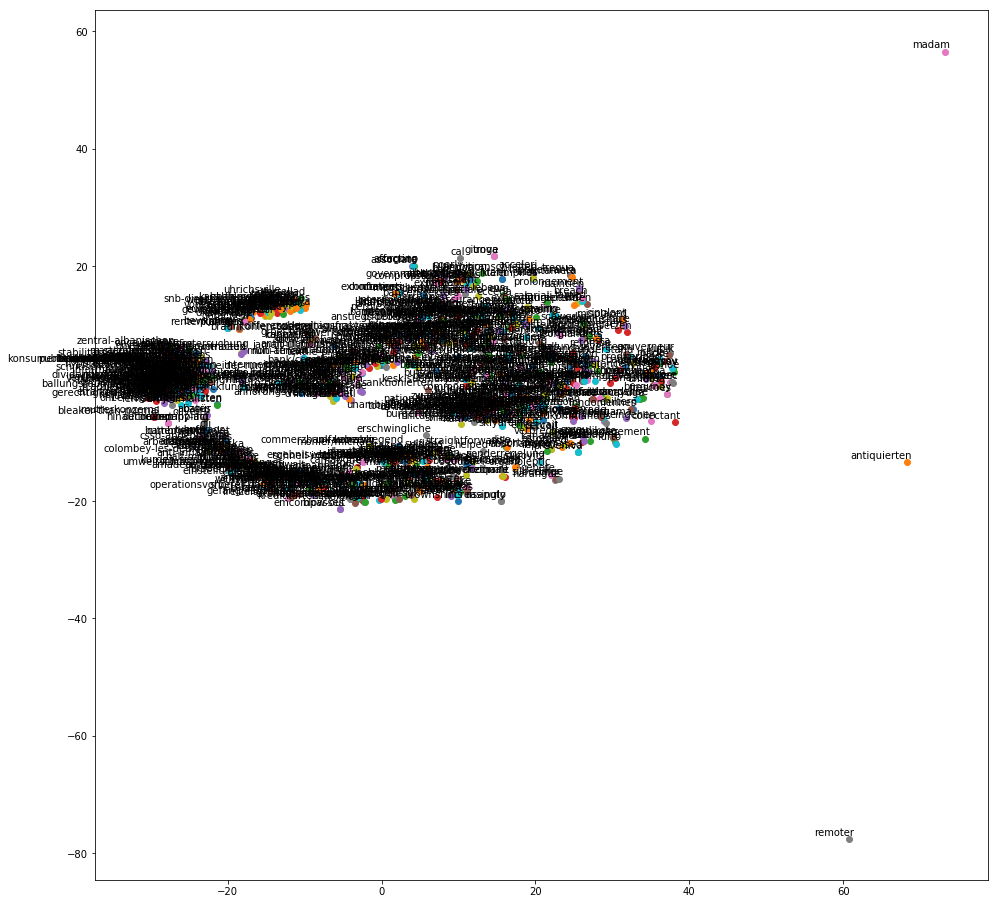

In [38]:
tsne_plot(model_sample)